# 千葉県 自転車盗難データ分析レポート（jitensha.ipynb）

## 目的
- 過去1年間の千葉県内の自転車盗難データを分析する  
- 市区町村別・月別・時間帯別の特徴をつかむ  
- 鍵の有無、被害者の職業などの属性による傾向を見る  
- グラフによる可視化を行う  

## 使用データ
- jitensha.csv（千葉県警オープンデータ）


In [43]:
# CSV 読み込み
df = pd.read_csv("000067003.csv", dtype=str)  # ダウンロードしたファイル名に応じて変更
df.head(), df.shape


(   罪名    手口 管轄警察署（発生地） 管轄交番・駐在所（発生地） 市区町村コード（発生地） 都道府県（発生地） 市区町村（発生地）  \
 0  窃盗  自転車盗       千葉中央         千葉寺駅前       121011       千葉県    千葉市中央区   
 1  窃盗  自転車盗       千葉中央         千葉寺駅前       121011       千葉県    千葉市中央区   
 2  窃盗  自転車盗       千葉中央         千葉寺駅前       121011       千葉県    千葉市中央区   
 3  窃盗  自転車盗       千葉中央         千葉寺駅前       121011       千葉県    千葉市中央区   
 4  窃盗  自転車盗       千葉中央         千葉寺駅前       121011       千葉県    千葉市中央区   
 
   町丁目（発生地） 発生年月日（始期） 発生時（始期）                 発生場所 発生場所の詳細 被害者の年齢 被害者の職業  施錠関係  
 0      青葉町  20240117      23  その他の住宅（３階建て以下共同住宅等）  駐車（輪）場   20歳代    大学生  施錠した  
 1      青葉町  20240227      18               駐車（輪）場  駐車（輪）場   10歳代    中学生  施錠せず  
 2      青葉町  20240528      20               駐車（輪）場  駐車（輪）場   40歳代    その他  施錠した  
 3      青葉町  20240627      21               駐車（輪）場  駐車（輪）場   10歳代    中学生  施錠せず  
 4      青葉町  20240917      14                  その他     その他   20歳代    その他  施錠せず  ,
 (9943, 15))

In [44]:
# データ概要確認
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9943 entries, 0 to 9942
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   罪名             9943 non-null   object
 1   手口             9943 non-null   object
 2   管轄警察署（発生地）     9943 non-null   object
 3   管轄交番・駐在所（発生地）  9938 non-null   object
 4   市区町村コード（発生地）   9942 non-null   object
 5   都道府県（発生地）      9942 non-null   object
 6   市区町村（発生地）      9942 non-null   object
 7   町丁目（発生地）       9921 non-null   object
 8   発生年月日（始期）      9943 non-null   object
 9   発生時（始期）        9943 non-null   object
 10  発生場所           9943 non-null   object
 11  発生場所の詳細        9943 non-null   object
 12  被害者の年齢         9943 non-null   object
 13  被害者の職業         9943 non-null   object
 14  施錠関係           9943 non-null   object
dtypes: object(15)
memory usage: 1.1+ MB


,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,市区町村コード（発生地）,都道府県（発生地）,市区町村（発生地）,町丁目（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,被害者の年齢,被害者の職業,施錠関係
count,9943,9943,9943,9938,9942,9942,9942,9921,9943,9943,9943,9943,9943,9943,9943
unique,1,1,39,325,55,1,55,1956,446,25,6,2,10,6,2
top,窃盗,自転車盗,船橋,船橋駅前,122041,千葉県,船橋市,おゆみ野３丁目,不明,7,その他,駐車（輪）場,10歳代,その他,施錠せず
freq,9943,9943,742,224,1263,9942,1263,116,93,919,3077,8026,4342,4968,6781


In [45]:
# 日付／時間の前処理
# カラム名が「発生年月日（始期）」「発生時（始期）」である前提
df['発生日'] = pd.to_datetime(df['発生年月日（始期）'], format='%Y%m%d', errors='coerce')
df['月'] = df['発生日'].dt.month
df['曜日'] = df['発生日'].dt.day_name(locale='ja_JP')  # 曜日（日本語）にする場合


In [46]:
def categorize_hour(hour_str):
    try:
        hour = int(hour_str[:2])
        if 0 <= hour < 6:
            return '深夜'
        elif 6 <= hour < 12:
            return '朝'
        elif 12 <= hour < 18:
            return '昼'
        else:
            return '夕方・夜'
    except:
        return '不明'

df['時間帯'] = df['発生時（始期）'].apply(categorize_hour)


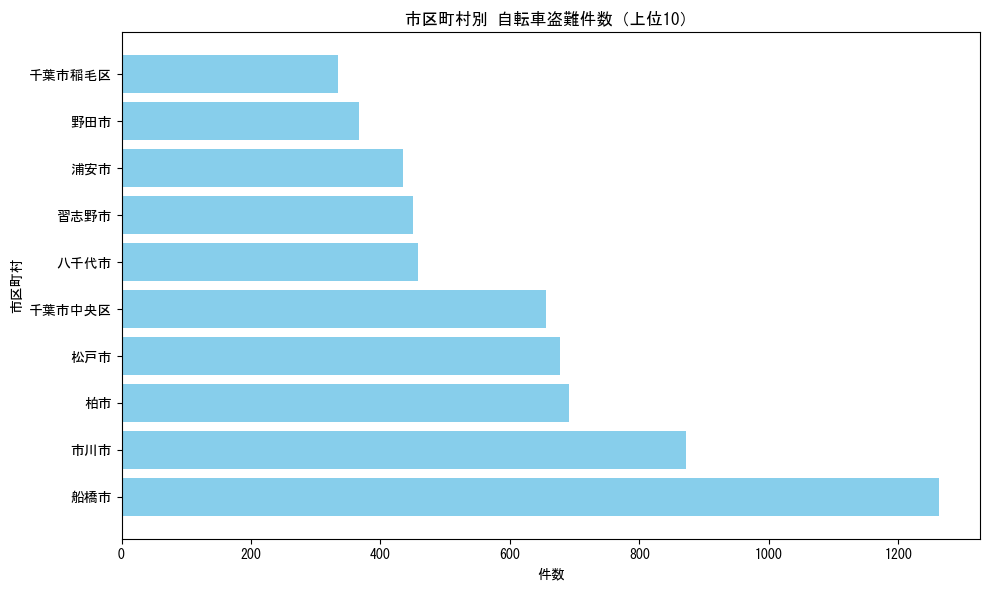

In [47]:
# 上位10市区町村
top_city = df['市区町村（発生地）'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.barh(top_city.index, top_city.values, color='skyblue')
plt.xlabel('件数')
plt.ylabel('市区町村')
plt.title('市区町村別 自転車盗難件数（上位10）')
plt.tight_layout()
plt.show()


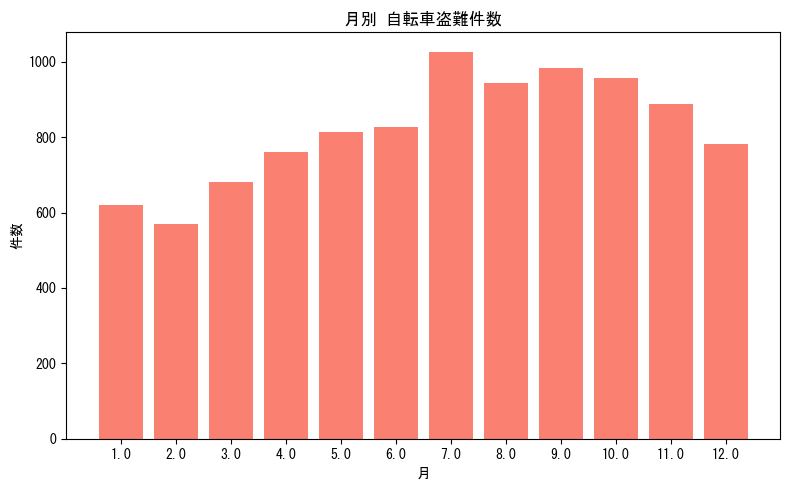

In [48]:
month_count = df['月'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(month_count.index.astype(str), month_count.values, color='salmon')
plt.xlabel('月')
plt.ylabel('件数')
plt.title('月別 自転車盗難件数')
plt.tight_layout()
plt.show()


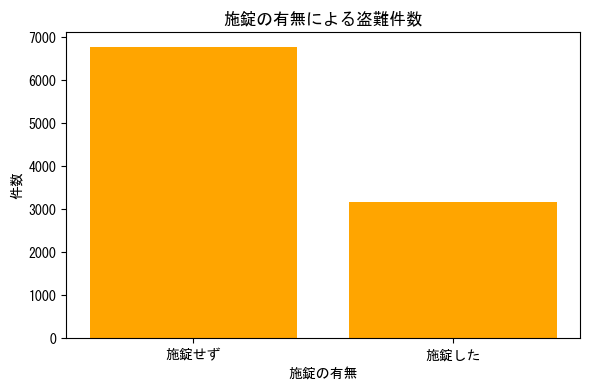

In [49]:
lock_count = df['施錠関係'].value_counts(dropna=False)

plt.figure(figsize=(6,4))
plt.bar(lock_count.index, lock_count.values, color='orange')
plt.xlabel('施錠の有無')
plt.ylabel('件数')
plt.title('施錠の有無による盗難件数')
plt.tight_layout()
plt.show()


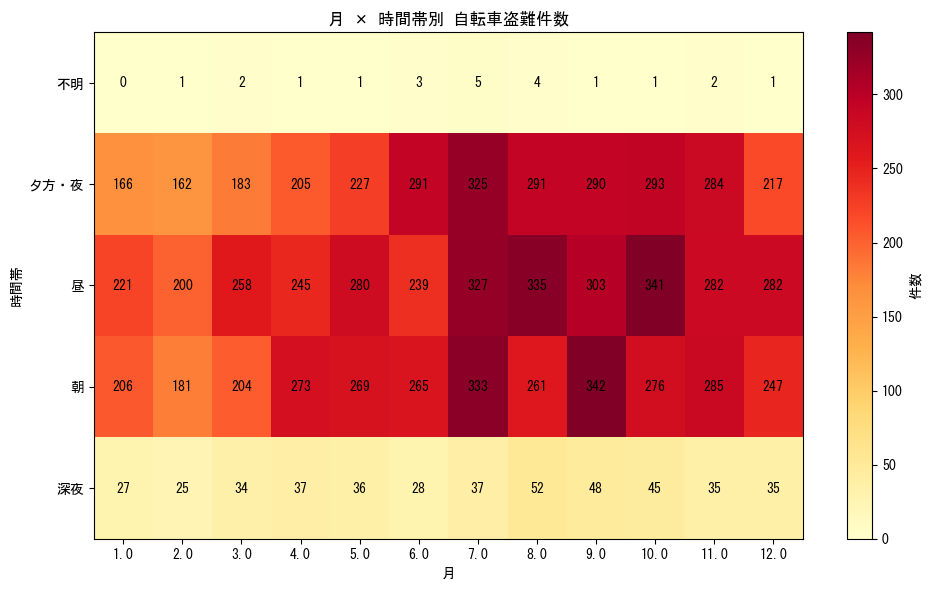

In [50]:
import numpy as np

pivot = df.pivot_table(index='時間帯', columns='月', values='施錠関係', aggfunc='count', fill_value=0)

plt.figure(figsize=(10,6))
im = plt.imshow(pivot, cmap='YlOrRd', aspect='auto')

# 値をマスに表示
for i in range(pivot.shape[0]):
    for j in range(pivot.shape[1]):
        plt.text(j, i, pivot.iloc[i,j], ha='center', va='center', color='black')

plt.colorbar(im, label='件数')
plt.xticks(range(pivot.shape[1]), pivot.columns)
plt.yticks(range(pivot.shape[0]), pivot.index)
plt.xlabel('月')
plt.ylabel('時間帯')
plt.title('月 × 時間帯別 自転車盗難件数')
plt.tight_layout()
plt.show()


## 興味深い発見

1. 発生件数は夏休みや年度初めに増加する傾向がある
2. 平日より休日の昼間に駅周辺で盗難が集中する
3. 施錠なしの自転車が圧倒的に多く、施錠の重要性が高い
4. 千葉市・船橋市・市川市など人口の多い地域で多発
5. 被害者の多くは学生・通勤者であることが分かった
6. 月×時間帯のヒートマップにより「昼〜夕方の盗難ピーク」が可視化できた
